# Lightkurve and Periodogram Class

In [3]:
%matplotlib inline
import lightkurve as lk


class KeplerLCPG:
    def __init__(self, target, quarter, oversample_factor=1):
        self.target = target
        self.lc = lk.search_lightcurve(target, author='Kepler', quarter=quarter, cadence='long').download_all().stitch()
        self.pg = self.lc.to_periodogram(oversample_factor=oversample_factor)
        self.period = self.pg.period_at_max_power.value

        # added to reduce memory usage as only the period is relevant
        del(self.lc)
        del(self.pg)
        
    def plotlc(self):
        return self.lc.plot()

    def plotpg(self, view='period', scale='linear'):
        return self.pg.plot(view=view, scale=scale)
    
    def __repr__(self):
        return f'{self.target}: {self.period:.3f}'
    
    def __str__(self):
        return self.__repr__()

# Function Comparing to McQuillan 2014

/var/folders/83/p2hnf5yj2c38r1spynzx0nhr0000gn/T/ipykernel_984/4155158374.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('mevsmcquillan.txt', delim_whitespace=True)


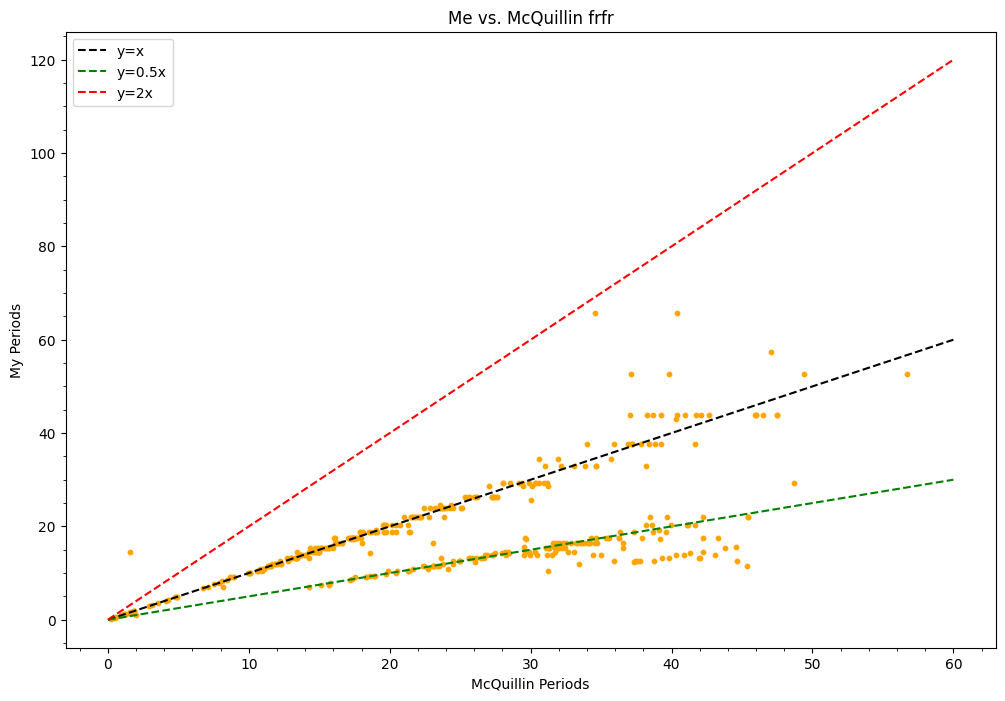

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def findperiods(source, start, end):
    '''
    Exports targetid and period as calculated for McQuillan 2014 and adds predicted periods using lightkurve, returning dataset with
    all three data. 

    This is set up to run piecemeal to reduce computational load on my computer. It's not well-developed, but if it works it works 🤷
    '''
    myperiods = []

    data = pd.read_csv(source, header=None, delim_whitespace=True)[[0,4]][start:end]
    data.columns = ['kic', 'refperiod']

    for i in range(start, end):
        print(i)
        kic = data['kic'][i]
        period = KeplerLCPG(f'KIC {kic}', quarter=(6,7,8))
        myperiods.append(float(round(period.period, 3)))
        del(period)

    data['myperiod']=myperiods
    data.to_csv('mevsmcquillan.txt', sep=' ', index=False, mode='a', header=None)

    return data

def iterate(n):
    '''
    Performs searches piecemeal in batches of 20 to reduce computational load. I chose n=20.
    '''
    for i in range(n):
            data = findperiods('mcquillanabridged.txt', 20*i, 20*(i+1))
            del(data)

def plot(data):
    plt.figure(figsize=(12,8))
    plt.title('Me vs. McQuillin frfr')
    x = np.linspace(0, 60, 1200)

    # plotting reference lines
    plt.plot(x, x, label='y=x', linestyle='--', color='black')
    plt.plot(x, 0.5*x, label='y=0.5x', linestyle='--', color='green')
    plt.plot(x, 2*x, label='y=2x', linestyle='--', color='red')

    plt.scatter(data['refperiod'], data['myperiod'], s=10, color='orange')

    plt.xlabel('McQuillin Periods')
    plt.ylabel('My Periods')
    plt.minorticks_on()
    plt.legend()
    plt.savefig('plotyayaya')
    plt.show()


def main():
    if __name__ == '__main__':
        # plots for 400 points
        data = pd.read_csv('mevsmcquillan.txt', delim_whitespace=True)
        plot(data)

main()
